<a href="https://colab.research.google.com/github/Th4l3s-pr0g/estudo-IA-CC/blob/main/AssociacaoOnlineRetail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Vamos importar os dados da planilha excel com o pandas.

In [ ]:
import pandas as pd
dataFrame = pd.read_excel("/content/Online Retail.xlsx")

In [ ]:
dataFrame.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


Antes de qualquer aplicaçao de aprendizado de máquina, é coerente fazer análise explortória dos dados.

In [ ]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


Vamos ver os campos que possuem registros nulos com a respectiva quantidade.

In [ ]:
dataFrame.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

Vamos ver alguns registros onde adescrição do produto é nula.

In [ ]:
dataFrame[dataFrame['Description'].isna()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535322,581199,84581,NaN,-2,2011-12-07 18:26:00,0.0,NaN,United Kingdom
535326,581203,23406,NaN,15,2011-12-07 18:31:00,0.0,NaN,United Kingdom
535332,581209,21620,NaN,6,2011-12-07 18:35:00,0.0,NaN,United Kingdom
536981,581234,72817,NaN,27,2011-12-08 10:33:00,0.0,NaN,United Kingdom


In [ ]:
dataFrame[dataFrame['CustomerID'].isna()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,2011-12-09 10:26:00,10.79,NaN,United Kingdom


Vamos avaliar a distribuição de tranações por país.

Text(0.5, 0, 'País')

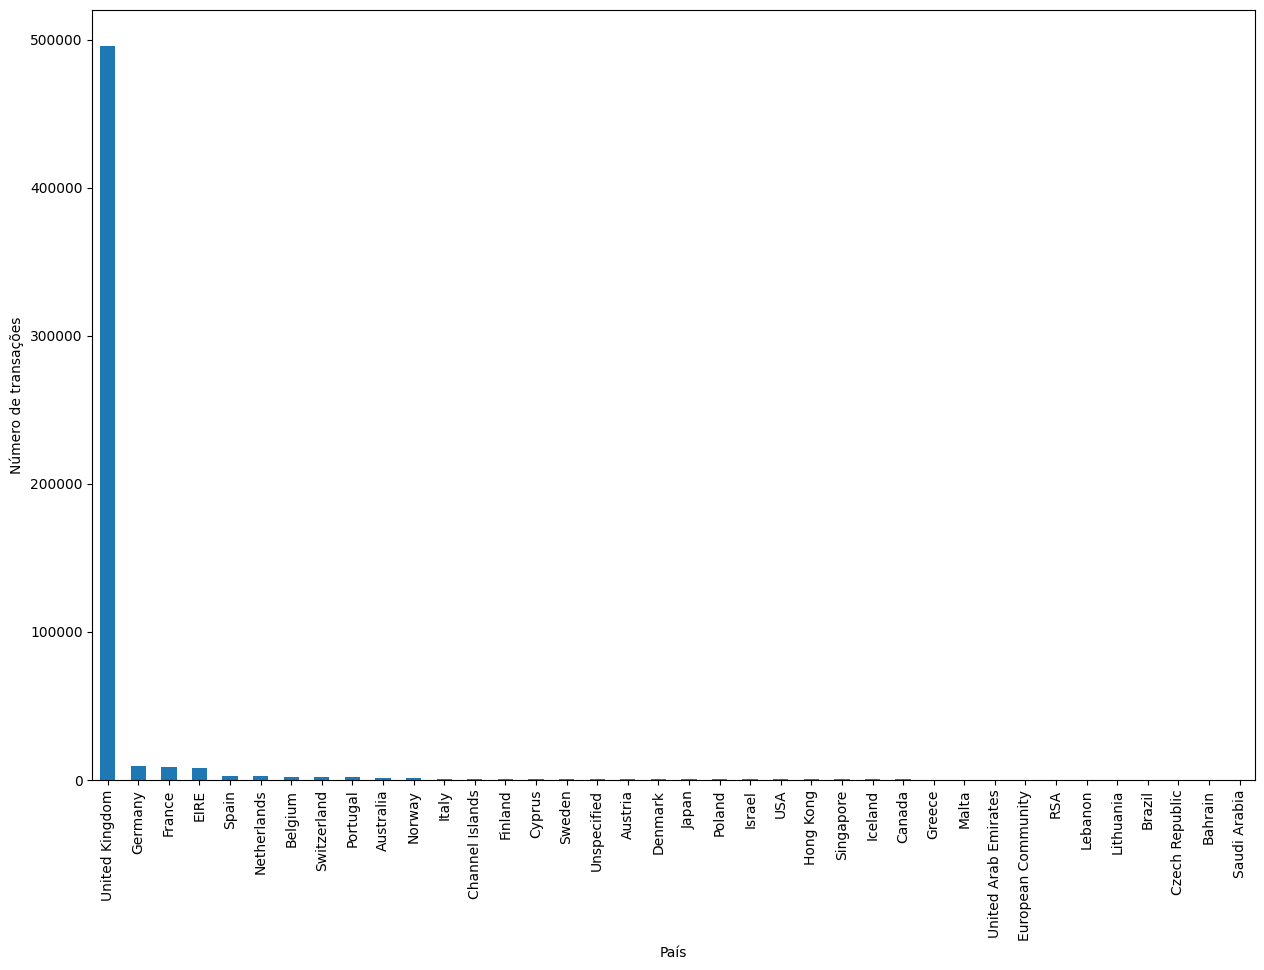

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
dataFrame['Country'].value_counts().plot(kind='bar')
plt.ylabel('Número de transações')
plt.xlabel('País')

Vamos avaliar a quantidade de itens adquiridos por transação

<Axes: >

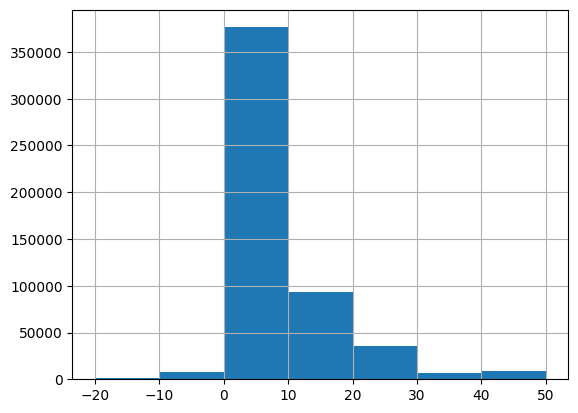

In [ ]:
dataFrame['Quantity'].hist(bins=7,range=(-20,50))

Vamos avaliar a distribuição dos preços dos produtos.

<Axes: >

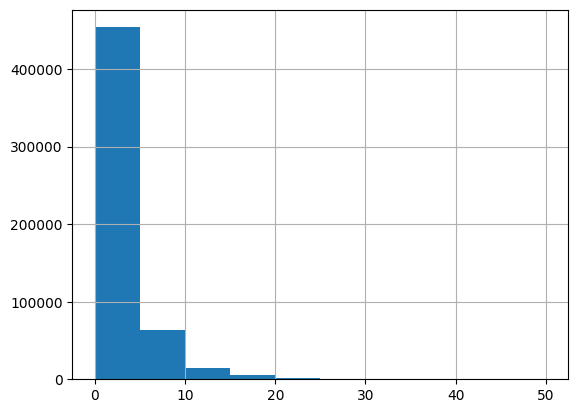

In [ ]:
dataFrame['UnitPrice'].hist(bins=10, range=(0,50))

Vamos avaliar os produtos mais populares.

In [ ]:
dataFrame['Description'].value_counts().head(10)

WHITE HANGING HEART T-LIGHT HOLDER    2369
REGENCY CAKESTAND 3 TIER              2200
JUMBO BAG RED RETROSPOT               2159
PARTY BUNTING                         1727
LUNCH BAG RED RETROSPOT               1638
ASSORTED COLOUR BIRD ORNAMENT         1501
SET OF 3 CAKE TINS PANTRY DESIGN      1473
PACK OF 72 RETROSPOT CAKE CASES       1385
LUNCH BAG  BLACK SKULL.               1350
NATURAL SLATE HEART CHALKBOARD        1280
Name: Description, dtype: int64

A descrição do produto que irá guiar a tarefa de associação. Diante disso, é coerente retirar os espaços em branco que exitem antes ou depois das descrições.
A função strip() retira os espaços em branco.

In [ ]:
dataFrame['Description']= dataFrame['Description'].str.strip()

Vamos deixar todos os valores da coluna Description apenas com letras minúsculas.

In [ ]:
dataFrame['Description']= dataFrame['Description'].str.lower()

Agora, vamos remover os registros que possuem valores nulos na descrição do produto

In [ ]:
dataFrame.dropna(axis=0, subset=['Description'], inplace=True)

In [ ]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 540454 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    540454 non-null  object        
 1   StockCode    540454 non-null  object        
 2   Description  540454 non-null  object        
 3   Quantity     540454 non-null  int64         
 4   InvoiceDate  540454 non-null  datetime64[ns]
 5   UnitPrice    540454 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      540454 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 37.1+ MB


Vamos excluir os registros que possuem a quantidade de produtos negativa.


In [ ]:
dataFrame[dataFrame['Quantity']<=0].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9761 entries, 141 to 541717
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    9761 non-null   object        
 1   StockCode    9761 non-null   object        
 2   Description  9761 non-null   object        
 3   Quantity     9761 non-null   int64         
 4   InvoiceDate  9761 non-null   datetime64[ns]
 5   UnitPrice    9761 non-null   float64       
 6   CustomerID   8905 non-null   float64       
 7   Country      9761 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 686.3+ KB


In [ ]:
dataFrame = dataFrame[~dataFrame['Quantity']<0]
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 530693 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    530693 non-null  object        
 1   StockCode    530693 non-null  object        
 2   Description  530693 non-null  object        
 3   Quantity     530693 non-null  int64         
 4   InvoiceDate  530693 non-null  datetime64[ns]
 5   UnitPrice    530693 non-null  float64       
 6   CustomerID   397924 non-null  float64       
 7   Country      530693 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 36.4+ MB


Agora vamos transpor a tabela de forma que cada um dos produtos vire uma coluna.

In [ ]:
dataFrame.groupby(['InvoiceNo','Description'])['Quantity'].sum()

InvoiceNo  Description                        
536365     cream cupid hearts coat hanger          8
           glass star frosted t-light holder       6
           knitted union flag hot water bottle     6
           red woolly hottie white heart.          6
           set 7 babushka nesting boxes            2
                                                  ..
581587     plasters in tin strongman              12
           spaceboy lunch box                     12
A563185    adjust bad debt                         1
A563186    adjust bad debt                         1
A563187    adjust bad debt                         1
Name: Quantity, Length: 519865, dtype: int64

In [ ]:
dataFrame[dataFrame['InvoiceNo'].str.contains('A',na=False)]
dataFrame = dataFrame[~dataFrame['InvoiceNo'].str.contains('A',na=False)]
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 530690 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    530690 non-null  object        
 1   StockCode    530690 non-null  object        
 2   Description  530690 non-null  object        
 3   Quantity     530690 non-null  int64         
 4   InvoiceDate  530690 non-null  datetime64[ns]
 5   UnitPrice    530690 non-null  float64       
 6   CustomerID   397924 non-null  float64       
 7   Country      530690 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 36.4+ MB


In [ ]:
basket = dataFrame.groupby(['InvoiceNo','Description'])['Quantity'].sum().unstack().fillna(0)

In [ ]:
basket

Description,*boombox ipod classic,*usb office mirror ball,10 colour spaceboy pen,12 coloured party balloons,12 daisy pegs in wood box,12 egg house painted wood,12 hanging eggs hand painted,12 ivory rose peg place settings,12 message cards with envelopes,12 pencil small tube woodland,...,zinc star t-light holder,zinc sweetheart soap dish,zinc sweetheart wire letter rack,zinc t-light holder star large,zinc t-light holder stars large,zinc t-light holder stars small,zinc top 2 door wooden shelf,zinc willie winkie candle stick,zinc wire kitchen organiser,zinc wire sweetheart letter tray
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536369,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581583,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581584,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581585,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,12.0,0.0,0.0,0.0,24.0,0.0,0.0


In [ ]:
basket[basket['10 colour spaceboy pen']>0]

Description,*boombox ipod classic,*usb office mirror ball,10 colour spaceboy pen,12 coloured party balloons,12 daisy pegs in wood box,12 egg house painted wood,12 hanging eggs hand painted,12 ivory rose peg place settings,12 message cards with envelopes,12 pencil small tube woodland,...,zinc star t-light holder,zinc sweetheart soap dish,zinc sweetheart wire letter rack,zinc t-light holder star large,zinc t-light holder stars large,zinc t-light holder stars small,zinc top 2 door wooden shelf,zinc willie winkie candle stick,zinc wire kitchen organiser,zinc wire sweetheart letter tray
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536408,0.0,0.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536535,0.0,0.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536544,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0
536560,0.0,0.0,96.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536618,0.0,0.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581196,0.0,0.0,48.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581217,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
581238,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Agora precisamos modificar as colunas com os produtos adquiridos para exibir apenas 1 ou 0. 1 se o produto foi comprado; 0 se não.

In [ ]:
def encode(x):
  if x <=0:
    return 0
  else:
    return 1

In [ ]:
encode(5)

1

In [ ]:
basket_encoded = basket.applymap(encode)

In [ ]:
basket_encoded[basket_encoded['10 colour spaceboy pen']>0]

Description,*boombox ipod classic,*usb office mirror ball,10 colour spaceboy pen,12 coloured party balloons,12 daisy pegs in wood box,12 egg house painted wood,12 hanging eggs hand painted,12 ivory rose peg place settings,12 message cards with envelopes,12 pencil small tube woodland,...,zinc star t-light holder,zinc sweetheart soap dish,zinc sweetheart wire letter rack,zinc t-light holder star large,zinc t-light holder stars large,zinc t-light holder stars small,zinc top 2 door wooden shelf,zinc willie winkie candle stick,zinc wire kitchen organiser,zinc wire sweetheart letter tray
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536408,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536535,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536544,0,0,1,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,1,0,0
536560,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536618,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581196,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
581217,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
581238,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Finalizamos a análise exploratória e a engenharia de features, agora, partiremos para a mineração utilizando a tarefa de associação.

In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules
frequent_items = apriori(basket_encoded, min_support=0.02, \
                         use_colnames=True)

/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [ ]:
frequent_items

In [ ]:
frequent_items.sort_values(by='support',ascending=False)

Agora que selecionamos os produtos com maior suporte, vamos ver a confiança.

In [ ]:
itemsConfidence = association_rules(frequent_items, \
                                    metric="confidence", \
                                    min_threshold=0.5)

In [ ]:
itemsConfidence

In [ ]:
itemsConfidence.sort_values(by='confidence',ascending=False)